In [1]:
pwd

'/Users/zofia/github/DFM/interactivePython'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import integrator
import sampler #as sampler
import model #as model
import diffusionmap as dm
import statistics_dfm as stat

import numpy as np
from simtk import openmm, unit
from openmmtools.constants import kB

import model
mdl=model.Model('Dimer')
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
print (mdl.testsystem.positions)
X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)
print('Initial distance is %f' % np.linalg.norm(X0[0,:]-X0[ 1,:]))

algoVect=0

# parameters
# this is the target temperature 
T=100.0
temperature =  T * unit.kelvin#300 * unit.kelvin
kT = kB * temperature


gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

TemperatureTAMDFactor=30.0
massScale=50.0

gammaScale=100.0
kappaScale=1000.0

print("TemperatureTAMDFactor = " + repr(TemperatureTAMDFactor))
temperatureAlpha= (T*TemperatureTAMDFactor)* unit.kelvin

print('Gamma is '+repr(gamma))
print('Temperature is '+repr(temperature))
print('Temperature TAMD '+repr(TemperatureTAMDFactor)+'xTemperature')
print('Mass alpha is '+repr(massScale)+'x Mass')



# simulation class sampler takes integrator class with chosen parameters as input
integrator=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, temperatureAlpha=temperatureAlpha, dt=dt, massScale=massScale, gammaScale=gammaScale, kappaScale=kappaScale)
samplerAlgo=sampler.Sampler(model=mdl, integrator=integrator, algorithm=0, dataFileName='Data')

# nrSteps is number of steps for each nrRep , and iterate the algo nrIterations times - total simulation time is nrSteps x nrIterations
# nrSteps=args.nrSteps
# nrEquilSteps = 10 #10000
# nrIterations=args.niterations
# nrRep=args.nreplicas

algoNames=samplerAlgo.algorithmName

simulatedTemperature=100



Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=3.55, unit=angstrom)
Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=3.55, unit=angstrom)
angstrom
System has 2 particle(s)
[[ 0.          0.          0.        ]
 [ 1.54999995  0.          0.        ]] A
Initial distance is 1.550000
TemperatureTAMDFactor = 30.0
Gamma is Quantity(value=1.0, unit=/picosecond)
Temperature is Quantity(value=100.0, unit=kelvin)
Temperature TAMD 30.0xTemperature
Mass alpha is 50.0x Mass
122.844802039 K


In [3]:
colorList=['red', 'blue', 'black', 'green']
    
# copy values for the two states from above
min1=1.55*model.unit.angstroms
min2=2.55*model.unit.angstroms


In [7]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []

#for np_name in glob.glob('/Users/zofia/github/DFM/Data/frontier_points/Traj/*.h5'):
for np_name in glob.glob('/Users/zofia/github/DFM/Data/frontier_points_corner/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

X_F=X



10
3


In [5]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/T100InitialCondition/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

X_IC=X


100
3


In [8]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X



10
3


3
(5000, 2, 3)


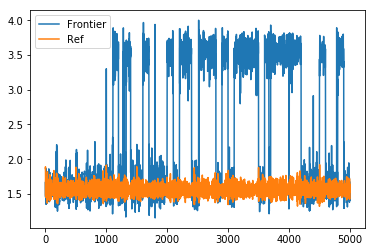

In [38]:

import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

print(X.shape)

#---------------- radius 

def radius(X):
    return np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
rref=np.linalg.norm(Xref[:,0,:]-Xref[:,1,:], 2, axis=1)
#rIC=np.linalg.norm(X_IC[:,0,:]-X_IC[:,1,:], 2, axis=1)
rF=np.linalg.norm(X_F[:,0,:]-X_F[:,1,:], 2, axis=1)


#print(r.shape)

plt.plot(range(len(rF)), rF)
#plt.plot(range(len(rIC)), rIC)
plt.plot(range(len(rref)), rref)
#plt.plot(range(len(rref)), np.ones(len(rref))*min1)
#plt.plot(range(len(rref)), np.ones(len(rref))*min2)
#plt.legend(['Frontier','max RMSD','Ref'])
plt.legend(['Frontier','Ref'])
plt.savefig("radius.eps",  format='eps', dpi=1000, bbox_inches='tight')
plt.show()

#print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
#print("Mean radius: " +repr(np.mean(r)))


In [11]:
#---------- VISUALISATION OF THE MOLECULE
#align according to first frame
traj[0]=traj[0].superpose(traj[0][0])
tpl=traj[0].topology
print(tpl)
import nglview as nv
view = nv.show_mdtraj(traj[0])

view.add_representation('spacefill', selection='all' )
view.frame = 10
view

#--- saving as gif: does not work :(
# from nglview.contrib.movie import MovieMaker
# movie = MovieMaker(view, output='my.gif')
# movie.make()


<mdtraj.Topology with 1 chains, 1 residues, 2 atoms, 0 bonds>


A Jupyter Widget

In [12]:
def plotResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    print(freeEnergyUnWeighted)
    freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergy, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()


    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
def plotAndSaveResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    #print(freeEnergyUnWeighted)
    #freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergyUnWeighted, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()#('V1_freeEn.png')

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()
    #plt.save('r_freeEn.png')

    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()
    
    
    #plt.save('V1_ePot.png')

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()
   
    plt.scatter(  r, Epot, c=V1)
    #plt.plot(  r[lm], Epot[lm], '-*r')
    plt.colorbar()
    plt.xlabel('radius')
    plt.ylabel('potential energy')
    plt.show()
   
    #plt.save('r_ePot.png')

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
    plt.scatter(  r, V1)
    #plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('radius')
    plt.ylabel('dominant eigenvector')
    plt.show()
    
    plt.scatter(  r,   Epot, c=V1)
    plt.plot(  r[lm], freeEnergyUnWeighted, '-*b')
    plt.xlabel('radius')
    plt.legend(['dominant eigenvector', 'free energy'])
    plt.show()
    #plt.save('r_V1.png')
    
def plotCompareResults(fe1, fe2, v11 , v12,  lm1, lm2, r1, r2):
    #print(freeEnergyUnWeighted)
    
  
    plt.plot(r1[lm1], fe1, '*-b')
    plt.plot(r2[lm2], fe2, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()



In [13]:
import imp
imp.reload(sampler)
imp.reload(dm)
imp.reload(stat)

def getDominantEigenvector(tr, eps, numberOfLandmarks, smpl, model, T, method): 
        
        tr_orig=tr
        
        tmp=md.Trajectory(tr, model.testsystem.topology)
        tmp = tmp.superpose(tmp[0])
        #------ reshape data ------------------------------

        tmp =  tmp.xyz.reshape((tmp.xyz.shape[0], tmp.xyz.shape[1]*tmp.xyz.shape[2]))
                
        tr=tmp
        v1, qTarget, qEmp, Epot, kernel=sampler.dominantEigenvectorDiffusionMap(tr, eps, smpl, T, method)
        
        #qTargetNormalized = qTarget/np.sum(qTarget)
        
        #get landmarks
        lm, levelsets, linspV = dm.get_landmarks(tr, numberOfLandmarks, qTarget, v1, Epot, getLevelSets=True)
        
        levelsets, levels = dm.get_levelsets(tr, numberOfLandmarks, qTarget, v1);
        
        tr =  tr.reshape((tr_orig.shape[0], tr_orig.shape[1],tr_orig.shape[2]))
        
        return tr, levelsets, v1, lm, qEmp, Epot, qTarget


def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                
            
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde
        else:
            return freeEnergy

maxLength=100

In [28]:
# numberOfLandmarks=10
# method='TMDiffmap'
# X=Xref
# V1iref=list()
# Xiref=list()
# print(len(traj))
# for i in range(1, len(traj)):
#     m=(int(i*len(X)/len(traj)))
#     Xi = X[:m]
#     while(len(Xi)>100):
#          Xi=Xi[::2]
    
#     Xi,lvst, V1i, lmi, qEmpi, Epoti, qTargeti =getDominantEigenvector(Xi, 1, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, method)

#     V1iref.append(V1i)
#     Xiref.append(Xi)
    


In [29]:
# print(len(traj))

# sign1=np.sign(V1iref[count][0])

# for count in range(len(traj)-1):
#         sign=np.sign(V1iref[count][0])
#         if(sign==sign1):
#             pass
#         else:
#             V1iref[count]=-1*V1iref[count]
#         plt.scatter(radius(Xiref[count]), V1iref[count], s=10)
#         plt.xlabel('radius')
#         plt.ylabel('dominant eigenvector')
# plt.show()
# #     axarr[0, 1].scatter(x, y)
# #     axarr[0, 1].set_title('Axis [0,1]')
# # # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# # plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# # plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)


In [17]:
method='TMDiffmap' #'Diffmap'
numberOfLandmarks=10
epsilon=1

# Xshort=X_IC
# while(len(Xshort)>maxLength):
#     Xshort=Xshort[::2]
# print("Shape of input data: "+repr((Xshort.shape)))

# # note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
# print("Target temperature is "+repr(samplerAlgo.T))


# # target temperature T= low temperature 100K
# XspIC,levelsetsIC, V1IC, lmIC, qEmpIC, EpotIC, qTargetIC =getDominantEigenvector(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, method)




In [30]:
Xshort=X_F
maxLength=1000
while(len(Xshort)>maxLength):
    Xshort=Xshort[::2]
print("Shape of input data: "+repr((Xshort.shape)))

# note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
print("Target temperature is "+repr(samplerAlgo.T))


# target temperature T= low temperature 100K
XspF,levelsetsF, V1F, lmF, qEmpF, EpotF, qTargetF =getDominantEigenvector(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, method)#'TMDiffmap')#'Diffmap')


Shape of input data: (625, 2, 3)
Target temperature is Quantity(value=100.0, unit=kelvin)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


In [31]:
Xshort=Xref
while(len(Xshort)>maxLength):
    Xshort=Xshort[::2]
print("Shape of input data: "+repr((Xshort.shape)))

# note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
print("Target temperature is "+repr(samplerAlgo.T))


# target temperature T= low temperature 100K
Xspref,levelsetsref, V1ref, lmref, qEmpref, Epotref, qTargetref =getDominantEigenvector(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, method)#'TMDiffmap')#'Diffmap')


Shape of input data: (625, 2, 3)
Target temperature is Quantity(value=100.0, unit=kelvin)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


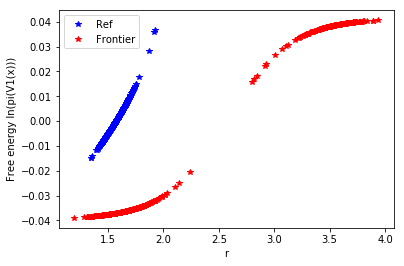

In [32]:
rref=np.linalg.norm(Xspref[:,0,:]-Xspref[:,1,:], 2, axis=1)
#rIC=np.linalg.norm(XspIC[:,0,:]-XspIC[:,1,:], 2, axis=1)
rF=np.linalg.norm(XspF[:,0,:]-XspF[:,1,:], 2, axis=1)

plt.plot(rref, V1ref, '*b')
plt.plot(rF, V1F, '*r')
#plt.plot(rIC, V1IC, '*g')
plt.legend(['Ref','Frontier','max rmsd'])
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

In [33]:

print("Target temperature is "+repr(samplerAlgo.T))
#qTargetTGT=np.exp(-EpotTGT/samplerAlgo.T)

freeEnergyref= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')
#freeEnergyIC= computeFreeEnergyAtLandmarkedPoint(qTargetIC, qEmpIC, levelsetsIC, method='raw')
freeEnergyF= computeFreeEnergyAtLandmarkedPoint(qTargetF, qEmpF, levelsetsF, method='raw')


# freeEnergyref, weightref, Ntilderef= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')
# freeEnergyIC, weightIC, NtildeIC= computeFreeEnergyAtLandmarkedPoint(qTargetIC, qEmpIC, levelsetsIC, method='raw')
# freeEnergyF, weightF, NtildeF= computeFreeEnergyAtLandmarkedPoint(qTargetF, qEmpF, levelsetsF, method='raw')



Target temperature is Quantity(value=100.0, unit=kelvin)


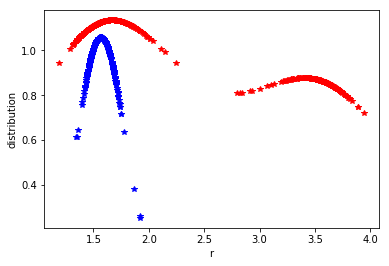

In [34]:
#qTarget=np.exp(-Epot/samplerAlgo.T)
plt.plot(rref, qEmpref/np.mean(qEmpref), '*b')
plt.plot(rF, qEmpF/np.mean(qEmpF), '*r')
#plt.plot(rIC, qEmpIC/np.mean(qEmpIC), '*g')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

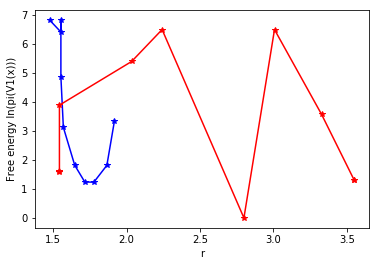

In [35]:

plt.plot(rref[lmref], freeEnergyref, '*-b')
#plt.plot(rIC[lmIC], freeEnergyIC, '*-g')
plt.plot(rF[lmF], freeEnergyF, '*-r')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()


In [ ]:
# plotResults(freeEnergyref, freeEnergyref, V1TGT, lmTGT, EpotTGT, rTGT)
# plotResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

# plotAndSaveResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
# plotAndSaveResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)